- Dataset : http://vis-www.cs.umass.edu/lfw/#download

- Dataset Structure :

```
DATASET\
    label_name_A\
        label_name_A_001.jpg
        label_name_A_002.jpg
        label_name_A_003.jpg
        .
        .
    label_name_B\
        label_name_B_001.jpg
        label_name_B_002.jpg
        label_name_B_003.jpg
        .
        .
```

In [ ]:
Test

In [1]:
import os 
from cv2 import cv2 
import numpy as np
import matplotlib.pyplot as plt


# disable GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
#Path to the root image directory containing sub-directories of images
dataset_folder = "DATASET"

data_slice = [70, 195, 78, 172] 
# [ymin, ymax, xmin, xmax]
# to extract the `interesting` part of the image files 
# and avoid use statistical correlation from the background 

# resize ratio to reduce sample dimension
resize_ratio = 2.5

h = int((data_slice[1] - data_slice[0])/resize_ratio) #ymax - ymin slice, Height of image in float
w = int((data_slice[3] - data_slice[2])/resize_ratio) #xmax - xmin slice, Width of image in float 
print("Image dimension after resize (h,w) :", h, w)

Image dimension after resize (h,w) : 50 37


In [2]:
#Path to the root image directory containing sub-directories of images
dataset_folder = "DATASET50KAWAN"

In [4]:
print(data_slice[2])

78


In [3]:
# minimum number of sample for each class
sample_class = 44
class_name = []

for folder in os.listdir(dataset_folder):
    if len(os.listdir(os.path.join(dataset_folder, folder))) >= sample_class:
        class_name.append(folder)

In [4]:
def print_progress(val, val_len, folder, bar_size=20):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] (%d samples)\t label : %s \t\t" % (progr, val, folder), end="\r")

In [7]:
# preprocessin data using OpenCV
imgs = []
labels = []

faceCascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
for folder in class_name:
    folder_files = os.listdir(os.path.join(dataset_folder, folder))
    len_sub_folder = len(folder_files) - 1
    for i, filename in enumerate(folder_files):
        img = cv2.imread(os.path.join(dataset_folder, folder, filename))
        # dsize = (240,320)
        # img = cv2.resize(img, dsize)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray, 1.3, 5)
        # print("test")
        # print(faces)
        for (x, y, w, h) in faces:
            data_slice = [y, int(y+h), x, int(x+w)]
            resize_ratio = 50
            h = int((data_slice[1] - data_slice[0])/resize_ratio) #ymax - ymin slice, Height of image in float
            w = int((data_slice[3] - data_slice[2])/resize_ratio) #xmax - xmin slice, Width of image in float 
            print("Image dimension after resize (h,w) :", h, w)
            # faces_crop = gray[y:y + h, x:x + w]
            # cv2.imshow("test",faces_crop)
            # cv2.waitKey(0)
            croped = gray[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]
        resized = cv2.resize(croped, (w,h))
        imgs.append(resized)
        labels.append(folder)
        
        # print_progress(i, len_sub_folder, folder)
cv2.waitKey(0)
cv2.destroyAllWindows()

Image dimension after resize (h,w) : 34 34
Image dimension after resize (h,w) : 37 37
Image dimension after resize (h,w) : 34 34
Image dimension after resize (h,w) : 34 34
Image dimension after resize (h,w) : 32 32
Image dimension after resize (h,w) : 31 31
Image dimension after resize (h,w) : 36 36
Image dimension after resize (h,w) : 24 24
Image dimension after resize (h,w) : 26 26
Image dimension after resize (h,w) : 27 27
Image dimension after resize (h,w) : 22 22
Image dimension after resize (h,w) : 25 25
Image dimension after resize (h,w) : 1 1
Image dimension after resize (h,w) : 24 24
Image dimension after resize (h,w) : 25 25
Image dimension after resize (h,w) : 35 35
Image dimension after resize (h,w) : 38 38
Image dimension after resize (h,w) : 2 2
Image dimension after resize (h,w) : 1 1
Image dimension after resize (h,w) : 38 38
Image dimension after resize (h,w) : 35 35
Image dimension after resize (h,w) : 33 33
Image dimension after resize (h,w) : 35 35
Image dimension a

In [13]:
print(croped)
x = np.array(croped)
print(x)

[[215 213 215 ... 207 206 207]
 [216 209 207 ... 207 206 206]
 [212 198 196 ... 205 206 206]
 ...
 [195 193 192 ... 119 116 117]
 [196 192 193 ... 115 115 107]
 [196 194 192 ... 114 113 113]]
[[215 213 215 ... 207 206 207]
 [216 209 207 ... 207 206 206]
 [212 198 196 ... 205 206 206]
 ...
 [195 193 192 ... 119 116 117]
 [196 192 193 ... 115 115 107]
 [196 194 192 ... 114 113 113]]


In [8]:
print(x)
print(y)
print(h)
print(w)

57
86
48
48


In [7]:
# preprocessin data using OpenCV
imgs = []
labels = []
faces_x = []
faces_y = []
faceCascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
for folder in class_name:
    folder_files = os.listdir(os.path.join(dataset_folder, folder))
    len_sub_folder = len(folder_files) - 1
    for i, filename in enumerate(folder_files):
        img = cv2.imread(os.path.join(dataset_folder, folder, filename))
        dsize = (480,640)
        img = cv2.resize(img, dsize)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray, 1.3, 5)
        # print("test")
        # print(faces)
        if len(faces) == 1:
        # crop the face
            x, y, w, h = faces[0]
            cropped_img = img[y:y + h, x:x + w]
            faces_x.append(cv2.resize(cropped_img, (128, 128)))
            faces_y.append(int(face.split('\\')[-2][1:]))
            # croped = gray[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]            
            # cv2.imshow("test",faces_crop)
            # cv2.waitKey(0)
        # croped = gray[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]
        # resized = cv2.resize(croped, (w,h))
        imgs.append(crop)
        labels.append(folder)
        
        # print_progress(i, len_sub_folder, folder)
faces_x, faces_y = np.array(faces_x), np.array(faces_y)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'face' is not defined

In [5]:
# preprocessin data using OpenCV
imgs = []
labels = []
for folder in class_name:
    folder_files = os.listdir(os.path.join(dataset_folder, folder))
    len_sub_folder = len(folder_files) - 1
    for i, filename in enumerate(folder_files):
        img = cv2.imread(os.path.join(dataset_folder, folder, filename))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        croped = gray[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]
        resized = cv2.resize(croped, (w,h))
        imgs.append(resized)
        labels.append(folder)
        
        print_progress(i, len_sub_folder, folder)


[####################] (49 samples)	 label : Ari 		
[####################] (49 samples)	 label : BukAri 		
[####################] (49 samples)	 label : Dinna 		
[####################] (49 samples)	 label : Eka 		


In [8]:
print("Number of samples \t: ", len(labels))
print("Number of class \t: ", len(class_name))
print("Class name \t\t: \n", class_name)

Number of samples 	:  244
Number of class 	:  5
Class name 		: 
 ['Anton', 'Dewik', 'Era', 'Tolik', 'Yayak']


In [12]:
# test preview image in index 0
cv2.imshow("preview sample image", imgs[100])

cv2.waitKey(0)
cv2.destroyAllWindows()

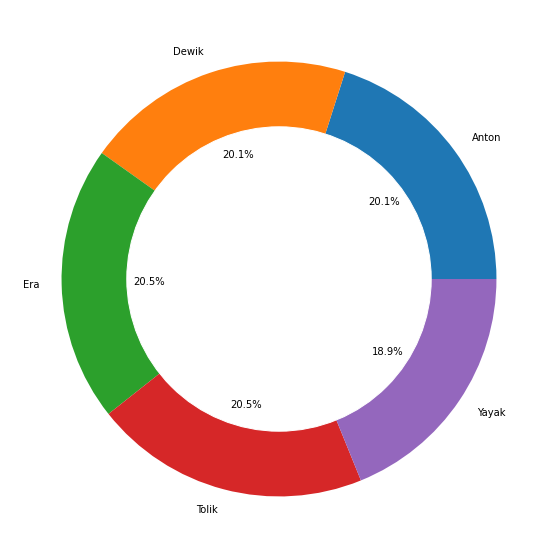

In [13]:
# preview data distribution

def print_data(label_distr, label_name):
    plt.figure(figsize=(20,10))

    my_circle = plt.Circle( (0,0), 0.7, color='white')
    plt.pie(label_distr, 
            labels=label_name,  
            autopct='%1.1f%%')

    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()
    
label_distr = {i:labels.count(i) for i in labels}.values()
print_data(label_distr, class_name)

### Balancing dataset

In [14]:
# reduce sample size per-class using numpy random choice
n = sample_class

def randc(labels, l):
    return np.random.choice(np.where(np.array(labels) == l)[0], n, replace=False)

mask = np.hstack([randc(labels, l) for l in np.unique(labels)])

In [15]:
balanced_labels = [labels[m] for m in mask]
balanced_imgs = [imgs[m] for m in mask]

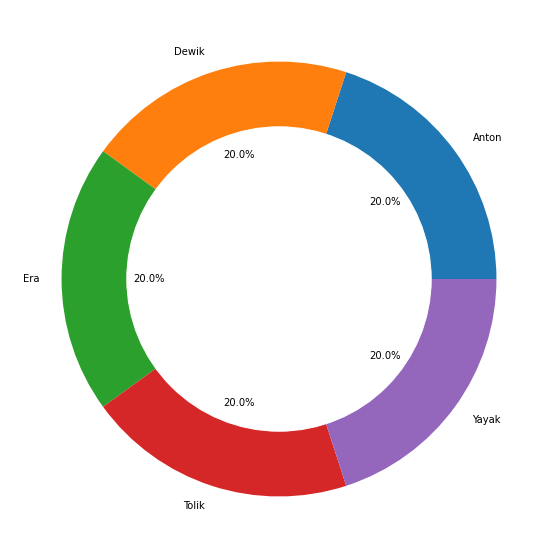

In [16]:
label_distr = {i:balanced_labels.count(i) for i in balanced_labels}.values()
print_data(label_distr, class_name)

### Prepare Dataset

In [17]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [17]:
print(balanced_imgs)

[array([[198, 211, 204, ...,  66,  71,  60],
       [204, 202, 190, ...,  67,  58,  64],
       [198, 206, 202, ...,  47,  65,  58],
       ...,
       [176, 181, 184, ...,  33,  51,  32],
       [178, 181, 181, ...,  16,  37,  40],
       [215, 240, 224, ...,  16,  28,  38]], dtype=uint8), array([[206,  93,  88, ...,  57,  63, 156],
       [176,  80,  71, ...,  58,  35, 115],
       [186,  87,  70, ...,  47,  54,  98],
       ...,
       [ 34,  37,  40, ...,  39,  34,  27],
       [ 41,  38,  49, ...,  27,  48,  27],
       [ 43,  40,  38, ...,  15,  37,  48]], dtype=uint8), array([[220, 216, 219, ..., 224, 228, 221],
       [217, 214, 222, ..., 218, 220, 213],
       [217, 213, 217, ..., 223, 217, 223],
       ...,
       [192, 185, 195, ..., 194, 188, 190],
       [189, 185, 172, ..., 189, 193, 186],
       [198, 186, 192, ..., 185, 190, 187]], dtype=uint8), array([[214, 215, 220, ...,  21,  29,  39],
       [216, 217, 197, ...,  36,  26,  24],
       [184, 197, 212, ...,  34,  40, 

In [18]:
X = np.array(balanced_imgs)

In [19]:
print(x)

773


#### Label encoding & categoricalize output vector

In [20]:
le = LabelEncoder()
le.fit(balanced_labels)
le.classes_

array(['Anton', 'Dewik', 'Era', 'Tolik', 'Yayak'], dtype='<U5')

In [21]:
class_name

['Anton', 'Dewik', 'Era', 'Tolik', 'Yayak']

In [22]:
Y = le.transform(balanced_labels)
Y = to_categorical(Y)

In [23]:
print(Y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


#### Split dataset

In [29]:
X_train, X_test, y_train, y_test = \
                    train_test_split(X, 
                                     Y, 
                                     test_size=0.25, 
                                     random_state=4)
  
print("Dimensi data :\n")
print("X train \t X test \t Y train \t Y test")  
print("%s \t \t %s \t\t %s \t %s" % (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Dimensi data :

X train 	 X test 	 Y train 	 Y test
(165,) 	 	 (55,) 		 (165, 5) 	 (55, 5)


### Build CNN Model

In [27]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout, Flatten, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [28]:
def resize_data(X_train, X_test):
    #
    # 4+D tensor with shape: batch_shape + (channels, rows, cols) if data_format='channels_first' or 
    # 4+D tensor with shape: batch_shape + (rows, cols, channels) if data_format='channels_last'.
    #
    print(K.image_data_format())
    if K.image_data_format() == 'channels_first':
        X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
        X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])
        # print(X_train.shape)
        input_shape = (1, X_train.shape[1], X_train.shape[2])
        # print(x_train)
    else:
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
        # print(X_train.shape)
        input_shape = (X_train.shape[1], X_train.shape[2], 1)
    return X_train, X_test, input_shape


In [26]:
print(X_train.shape[1])

50


In [29]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [30]:
def cnn_model(image_shape, output_size):
    opt = Adam() #learning_rate=0.001
    
    model = Sequential()
    
    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=image_shape))
    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
              
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())
    
    model.add(Dropout(0.2))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation="relu"))
    model.add(Dense(output_size))
    model.add(Activation("softmax"))
    
    model.summary() 
    
    model.compile(optimizer=opt, 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy', precision, recall])

    return model

In [31]:
X_train, X_test, input_shape = resize_data(X_train, X_test)
EPOCHS = 40
BATCH_SIZE = 64

model = cnn_model(input_shape, len(class_name))


callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)]
    
history = model.fit(X_train, 
                      y_train,
                      epochs=EPOCHS,
                      batch_size=BATCH_SIZE,
                      callbacks=callbacks,
                      validation_data=(X_test,y_test))

model.load_weights('best_model.h5')

channels_last


IndexError: tuple index out of range

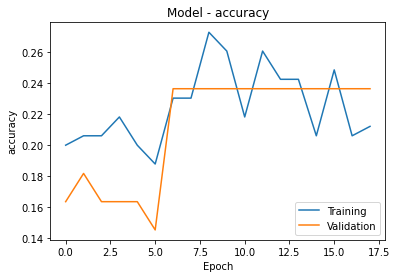

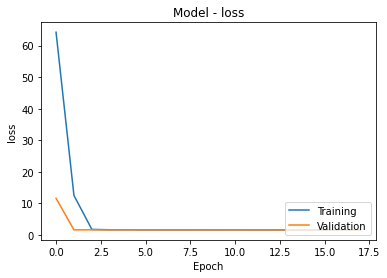

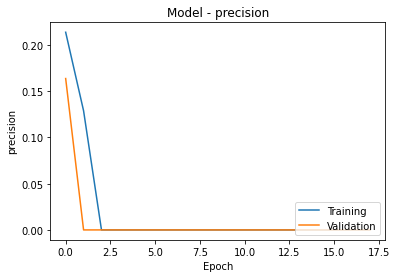

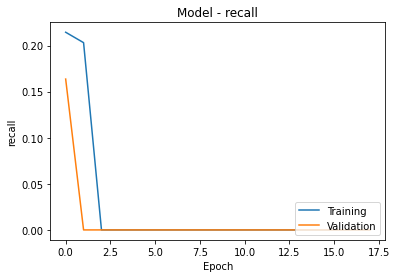

In [22]:
def evaluate_model(history):
    names = [['accuracy', 'val_accuracy'], 
             ['loss', 'val_loss'], 
             ['precision', 'val_precision'], 
             ['recall', 'val_recall']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.show()
        
evaluate_model(history)

In [23]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

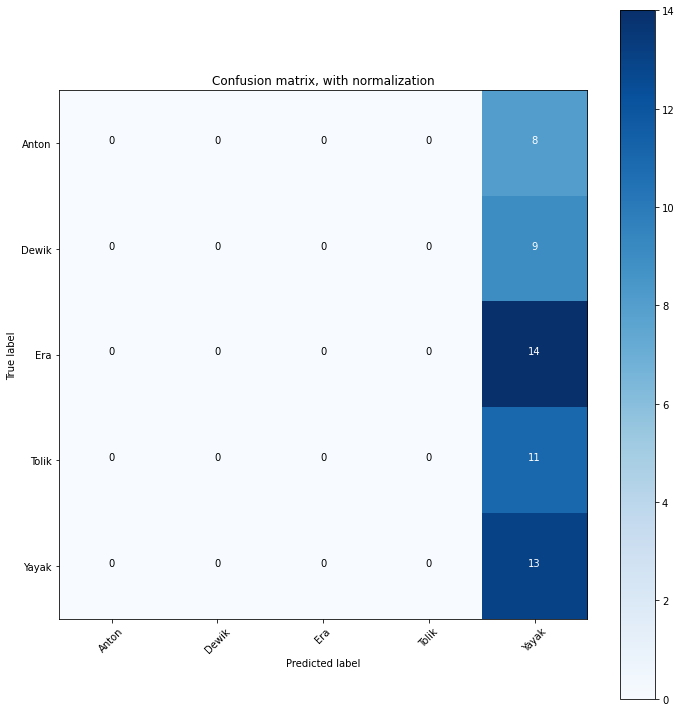

In [24]:
# predict test data
y_pred=model.predict(X_test)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, 
                      classes=class_name,
                      normalize=False,
                      title='Confusion matrix, with normalization')


In [25]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=class_name))

              precision    recall  f1-score   support

       Anton       0.00      0.00      0.00         8
       Dewik       0.00      0.00      0.00         9
         Era       0.00      0.00      0.00        14
       Tolik       0.00      0.00      0.00        11
       Yayak       0.24      1.00      0.38        13

    accuracy                           0.24        55
   macro avg       0.05      0.20      0.08        55
weighted avg       0.06      0.24      0.09        55

C:\Users\MyPc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MyPc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-de

Tolik Punya

In [28]:
data_slice = [70, 195, 78, 172] 
# [ymin, ymax, xmin, xmax]
# to extract the `interesting` part of the image files 
# and avoid use statistical correlation from the background 

# resize ratio to reduce sample dimension
resize_ratio = 2.5

h = int((data_slice[1] - data_slice[0])/resize_ratio) #ymax - ymin slice, Height of image in float
w = int((data_slice[3] - data_slice[2])/resize_ratio) #xmax - xmin slice, Width of image in float 
print("Image dimension after resize (h,w) :", h, w)

Image dimension after resize (h,w) : 50 37


In [26]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
image = cv2.imread('E:\Tolik\KULIAH\Seminar\git\Face-Recognition-CNN-Keras-OpenCV-master\DATAUJI50KAWAN\Anton\Anton-01.JPG')  
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
croped = gray[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, wf, hf) in faces:
    r = max(wf, hf) / 0.1
    centerx = x + wf / 2
    centery = y + hf / 2
    nx = int(centerx - r)
    ny = int(centery - r)
    nr = int(r * 2)

    # preprocessing
    face_crop = gray[ny:ny+nr, nx:nx+nr]
    face_crop = cv2.resize(face_crop, (250,250))
    face_crop = face_crop[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]
    FaceImage = cv2.resize(face_crop, (w,h))
    cv2.imshow("face", FaceImage)
    
    FaceImage, __, __ = resize_data(np.array([FaceImage]), np.array([FaceImage]))

    # predict image
    predicted_obj = model.predict(FaceImage)
    print(predicted_obj)
    predicted_class = class_name[np.argmax(predicted_obj)]
    print(predicted_class)
    confidence_level = np.round(np.max(predicted_obj), 3)*100.0
    print(confidence_level)

    print(predicted_obj, end="\r")         

cv2.waitKey(0)
cv2.destroyAllWindows()


[[0.2  0.2  0.2  0.2  0.21]]
Yayak
20.600000023841858


## Model Inference Test

In [32]:
import os.path
os.path.isfile('E:\Tolik\KULIAH\Seminar\git\Face-Recognition-CNN-Keras-OpenCV-master\DATASET\Colin_Powell\Colin_Powell_0001.jpg')
print(os.path.isfile('E:\Tolik\KULIAH\Seminar\git\Face-Recognition-CNN-Keras-OpenCV-master\DATASET\Colin_Powell\Colin_Powell_0001.jpg'))

True


In [105]:
import face_recognition
from PIL import Image
import numpy as np
from numpy import asarray
from cv2 import cv2
import matplotlib.pyplot as plt

cap = cv2.imread('E:\Tolik\KULIAH\Seminar\git\Face-Recognition-CNN-Keras-OpenCV-master\DATASET\Colin_Powell\Colin_Powell_0002.jpg',cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
np_img = np.array(cap)


test = []
face = []
xv, yv, cv = cap.shape
gray = cv2.cvtColor(cap, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
cy, cx = y + (hf//2), x + (wf//2)
max_len = max(hf,wf) + 70

# if (x - max_len) <= 0 or (x + max_len) >= xv or (y - max_len) <= 0 or (y + max_len) >= yv :
#     print("if ny jalan")
#     continue

# Load the image
gray = cv2.imread('E:\Tolik\KULIAH\Seminar\git\Face-Recognition-CNN-Keras-OpenCV-master\DATASET\Colin_Powell\Colin_Powell_0002.jpg', 0)
# Detect faces

faceCascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
faces = faceCascade.detectMultiScale(
gray,
scaleFactor=1.1,
minNeighbors=5,
flags=cv2.CASCADE_SCALE_IMAGE
)
# For each face
for (x, y, w, h) in faces: 
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 3)

    # extract the face
    face_boundary = faces[x:x+w, y:y+h]

    # resize pixels to the model size
    face_image = Image.fromarray(face_boundary)
    face_image = face_image.resize(250,250)
    face_array = asarray(face_image)
    face_images.append(face_array)

plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()
    
# print(FaceImage)
# predicted_obj = model.predict(FaceImage)
# predicted_class = class_name[np.argmax(predicted_obj)]
# confidence_level = np.round(np.max(predicted_obj), 3)*100.0

print(predicted_obj, end="\r")         

#     if confidence_level >= 70 :
#         # create box on detected face
#         frame = cv2.rectangle(frame,(cx-max_len,cy-max_len),(cx+max_len,cy+max_len),(0,0,255),1)

#         frame = cv2.rectangle(frame,(x,y),(x+wf,y+hf),(255,0,0),1)
#         frame = cv2.rectangle(frame,(x,y+hf),(x+wf,y+hf+30),(255,0,0),-1)

#         # print label name on image
#         cv2.putText(frame,
#                     "%s (%.1f)" % (predicted_class, confidence_level),
#                     (x + x//10, y+hf+20),
#                     cv2.FONT_HERSHEY_SIMPLEX,
#                     0.4,
#                     (255, 255, 255), 1)
#     cv2.imshow('cap',cap)
cv2.waitKey(0) 
cv2.destroyAllWindows() 
    # if cv2.waitKey(1) & 0xFF == ord('q'):

ValueError: tile cannot extend outside image

In [108]:

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

data_slice = [70, 195, 78, 172] 
# [ymin, ymax, xmin, xmax]
# to extract the `interesting` part of the image files 
# and avoid use statistical correlation from the background 

# resize ratio to reduce sample dimension
resize_ratio = 2.5

h = int((data_slice[1] - data_slice[0])/resize_ratio) #ymax - ymin slice, Height of image in float
w = int((data_slice[3] - data_slice[2])/resize_ratio)

img = cv2.imread('meki.jpg', cv2.COLOR_BGR2GRAY)
# cv2.imshow('as', img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,wf,hf) in faces:
    cy, cx = y + (hf//2), x + (wf//2)
    max_len = max(hf,wf) + 70

    # if (x - max_len) <= 0 or (x + max_len) >= xv or (y - max_len) <= 0 or (y + max_len) >= yv :
    #     continue

    cropped = gray[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]
    resized = cv2.resize(cropped, (w, h))

    # face_crop = gray[cy-max_len:cy+max_len, cx-max_len:cx+max_len]
    # print(face_crop)
    # face_crop = cv2.resize(face_crop, (250,250))
    # print(data_slice[0])
    # face_crop = face_crop[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]

    FaceImage = cv2.resize(cropped, (w, h))
    cv2.imshow("face", FaceImage)
    
    FaceImage, __, __ = resize_data(np.array([FaceImage]), np.array([FaceImage]))

    # predict image
    predicted_obj = model.predict(FaceImage)
    predicted_class = class_name[np.argmax(predicted_obj)]
    confidence_level = np.round(np.max(predicted_obj), 3)*100.0

    print(predicted_obj, end="\r")         

#     if confidence_level >= 70 :
#         # create box on detected face
#         frame = cv2.rectangle(img,(cx-max_len,cy-max_len),(cx+max_len,cy+max_len),(0,0,255),1)
# cv2.FONT_HERSHEY_SIMPLEX,
#                     0.4,
#                     (255, 255, 255), 1)
# cv2.imshow('frame',img)
cv2.waitKey()
# When everything done, release the capture
cv2.destroyAllWindows()
#         frame = cv2.rectangle(img,(x,y),(x+wf,y+hf),(255,0,0),1)
#         frame = cv2.rectangle(img,(x,y+hf),(x+wf,y+hf+30),(255,0,0),-1)

#         # print label name on image
#         cv2.putText(frame,
#                     "%s (%.1f)" % (predicted_class, confidence_level),
#                     (x + x//10, y+hf+20),
#                     

Error: IPyKernel not installed into interpreter Python 3.8.5 64-bit (conda):C:\Users\MyPc\anaconda3\python.exe

In [14]:
print(cap.set)

<built-in method set of cv2.VideoCapture object at 0x000001A057A9B5B0>


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

def classify(img_path):
    img_path = "E:\Tolik\KULIAH\Seminar\git\Face-Recognition-CNN-Keras-OpenCV-master\DATASET\Colin_Powell\Colin_Powell_0001.jpg"
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)

    img_batch = np.expand_dims(img_array, axis=0)

    img_preprocessed = preprocess_input(img_batch)

    model = tf.keras.applications.resnet50.ResNet50()
    prediction = model.predict(img_preprocessed)

    print(decode_predictions(prediction, top=3)[0])

classify("./samples/dog_1100x628.jpg")

2.4.1
40960/35363 [==================================] - 0s 1us/step
[('n04591157', 'Windsor_tie', 0.5124673), ('n04350905', 'suit', 0.27179116), ('n04404412', 'television', 0.09175861)]


In [31]:
import face_recognition
from PIL import Image
import numpy as np
from numpy import asarray
from cv2 import cv2

cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

cap.set(3,640)
cap.set(4,480)

while(True):
    # Capture frame-by-frame
    test = []
    face = []
    ret, frame = cap.read()
    xv, yv, cv = frame.shape
    if ret == True :
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        try :
            for (x,y,wf,hf) in faces:
                cy, cx = y + (hf//2), x + (wf//2)
                max_len = max(hf,wf) + 70

                if (x - max_len) <= 0 or (x + max_len) >= xv or (y - max_len) <= 0 or (y + max_len) >= yv :
                    continue

                # preprocessing
                face_crop = gray[cy-max_len:cy+max_len, cx-max_len:cx+max_len]
                print(face_crop)
                face_crop = cv2.resize(face_crop, (250,250))
                print(data_slice[0])
                face_crop = face_crop[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]
                FaceImage = cv2.resize(face_crop, (w,h))
                cv2.imshow("face", FaceImage)
                
                FaceImage, __, __ = resize_data(np.array([FaceImage]), np.array([FaceImage]))

                # predict image
                predicted_obj = model.predict(FaceImage)
                predicted_class = class_name[np.argmax(predicted_obj)]
                confidence_level = np.round(np.max(predicted_obj), 3)*100.0

                # print(predicted_obj, end="\r")         

                if confidence_level >= 70 :
                    # create box on detected face
                    frame = cv2.rectangle(frame,(cx-max_len,cy-max_len),(cx+max_len,cy+max_len),(0,0,255),1)

                    frame = cv2.rectangle(frame,(x,y),(x+wf,y+hf),(255,0,0),1)
                    frame = cv2.rectangle(frame,(x,y+hf),(x+wf,y+hf+30),(255,0,0),-1)

                    # print label name on image
                    cv2.putText(frame,
                                "%s (%.1f)" % (predicted_class, confidence_level),
                                (x + x//10, y+hf+20),
                                cv2.FONT_HERSHEY_SIMPLEX,
                                0.4,
                                (255, 255, 255), 1)
            cv2.imshow('frame',frame)
        except:
            cv2.imshow('frame',frame)
        
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


[[116 116 116 ...  74  75  77]
 [117 116 116 ...  74  74  77]
 [118 118 118 ...  73  74  74]
 ...
 [ 85  85  81 ...  28  28  29]
 [ 81  81  80 ...  28  28  28]
 [ 81  81  79 ...  29  28  29]]
[[116 116 116 ...  74  75  77]
 [117 116 116 ...  74  74  77]
 [118 118 118 ...  73  74  74]
 ...
 [ 85  85  81 ...  28  28  29]
 [ 81  81  80 ...  28  28  28]
 [ 81  81  79 ...  29  28  29]]
[[141 140 141 ... 177 176 177]
 [140 140 140 ... 176 175 176]
 [139 138 139 ... 176 175 176]
 ...
 [104 104 105 ... 103 104 102]
 [104 104 104 ... 101 101  99]
 [104 104 105 ... 101 103 101]]
[[141 140 141 ... 177 176 177]
 [140 140 140 ... 176 175 176]
 [139 138 139 ... 176 175 176]
 ...
 [104 104 105 ... 103 104 102]
 [104 104 104 ... 101 101  99]
 [104 104 105 ... 101 103 101]]


In [1]:
print(img)

NameError: name 'img' is not defined

In [7]:
from cv2 import cv2
import os

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
# video_capture = cv2.VideoCapture(0)

# Call the trained model yml file to recognize faces
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read("best_model.h5")

# Names corresponding to each id
names = []
for users in os.listdir("DATASET"):
    names.append(users)

img = cv2.imread("E:\Tolik\KULIAH\Seminar\git\Face-Recognition-CNN-Keras-OpenCV-master\DATASET\Colin_Powell\Colin_Powell_0001.jpg")

while True:

    # _, img = video_capture.read()

    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray_image, scaleFactor=1.2, minNeighbors=5, minSize=(100, 100)
    )

    # Try to predict the face and get the id
    # Then check if id == 1 or id == 2
    # Accordingly add the names
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        id, _ = recognizer.predict(gray_image[y : y + h, x : x + w])
        if id:
            cv2.putText(
                img,
                names[id - 1],
                (x, y - 4),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.8,
                (0, 255, 0),
                1,
                cv2.LINE_AA,
            )
        else:
            cv2.putText(
                img,
                "Unknown",
                (x, y - 4),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.8,
                (255, 0, 0),
                1,
                cv2.LINE_AA,
            )

    cv2.imshow("Recognize", img)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# video_capture.release()
cv2.destroyAllWindows()

AttributeError: module 'cv2.cv2' has no attribute 'face'

In [4]:
import face_recognition
import numpy as np
from cv2 import cv2

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
cap = cv2.imread('E:\Tolik\KULIAH\Seminar\git\Face-Recognition-CNN-Keras-OpenCV-master\DATASET\Colin_Powell\Colin_Powell_0001.jpg',cv2.COLOR_BGR2GRAY)

    # Capture frame-by-frame
test = []
face = []
xv, yv, cv= cap.shape
print(cap)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[40 26 28]
  [40 26 28]
  [39 25 27]
  ...
  [15 14 24]
  [17 16 26]
  [15 14 24]]

 [[39 25 27]
  [39 25 27]
  [41 24 27]
  ...
  [ 7  8 18]
  [12 13 23]
  [12 13 23]]

 [[39 25 27]
  [39 25 27]
  [41 24 27]
  ...
  [ 7  8 18]
  [12 13 23]
  [12 13 23]]]


In [4]:
cap.release()
cv2.destroyAllWindows()

In [35]:
data_slice

[70, 195, 78, 172]